# **_Multivariate Outliers_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter Notebook is an extrapolation on a coding lesson from the **Data Normalization and Outliers** section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goal:_**

-   Demonstrate the ability to identify and remove multivariate outliers using the following steps:

    1. Create two normal distributions.

        - Manually force some of the datapoints to the edges of the distribution so we can easily...

        - ...pick a threshold for outliers and identify them.

        - Plot one distribution against the other in straightforward, separate $x$ vs. $y$ fashion.

        - Indicate outliers in this 2D space.

    2. Now consider both distributions as part of a single, multivariate distribution...

        - Calculate Euclidean distance via $d_{a,b} = \sqrt{(a_x - b_x)^2 + (a_y - b_y)^2}$.

        - Use the regular z-score method to normalize the distances to the center of the Euclidean space in standard deviation units.

        - Plot this z-score normalized multivariate distribution.

        - Indicate outliers: see how this plot shows the same outliers, but they're now configured differently since the datapoints are arranged according to Euclidean distance to the mean, rather than previously with the straight $x$ vs. $y$ plot.

    3. **REMOVE** the outliers.

        - Replot the z-score normalized multivariate data _without_ outliers.

        - We should see almost the same plot as previous, just cleaned up a bit!

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

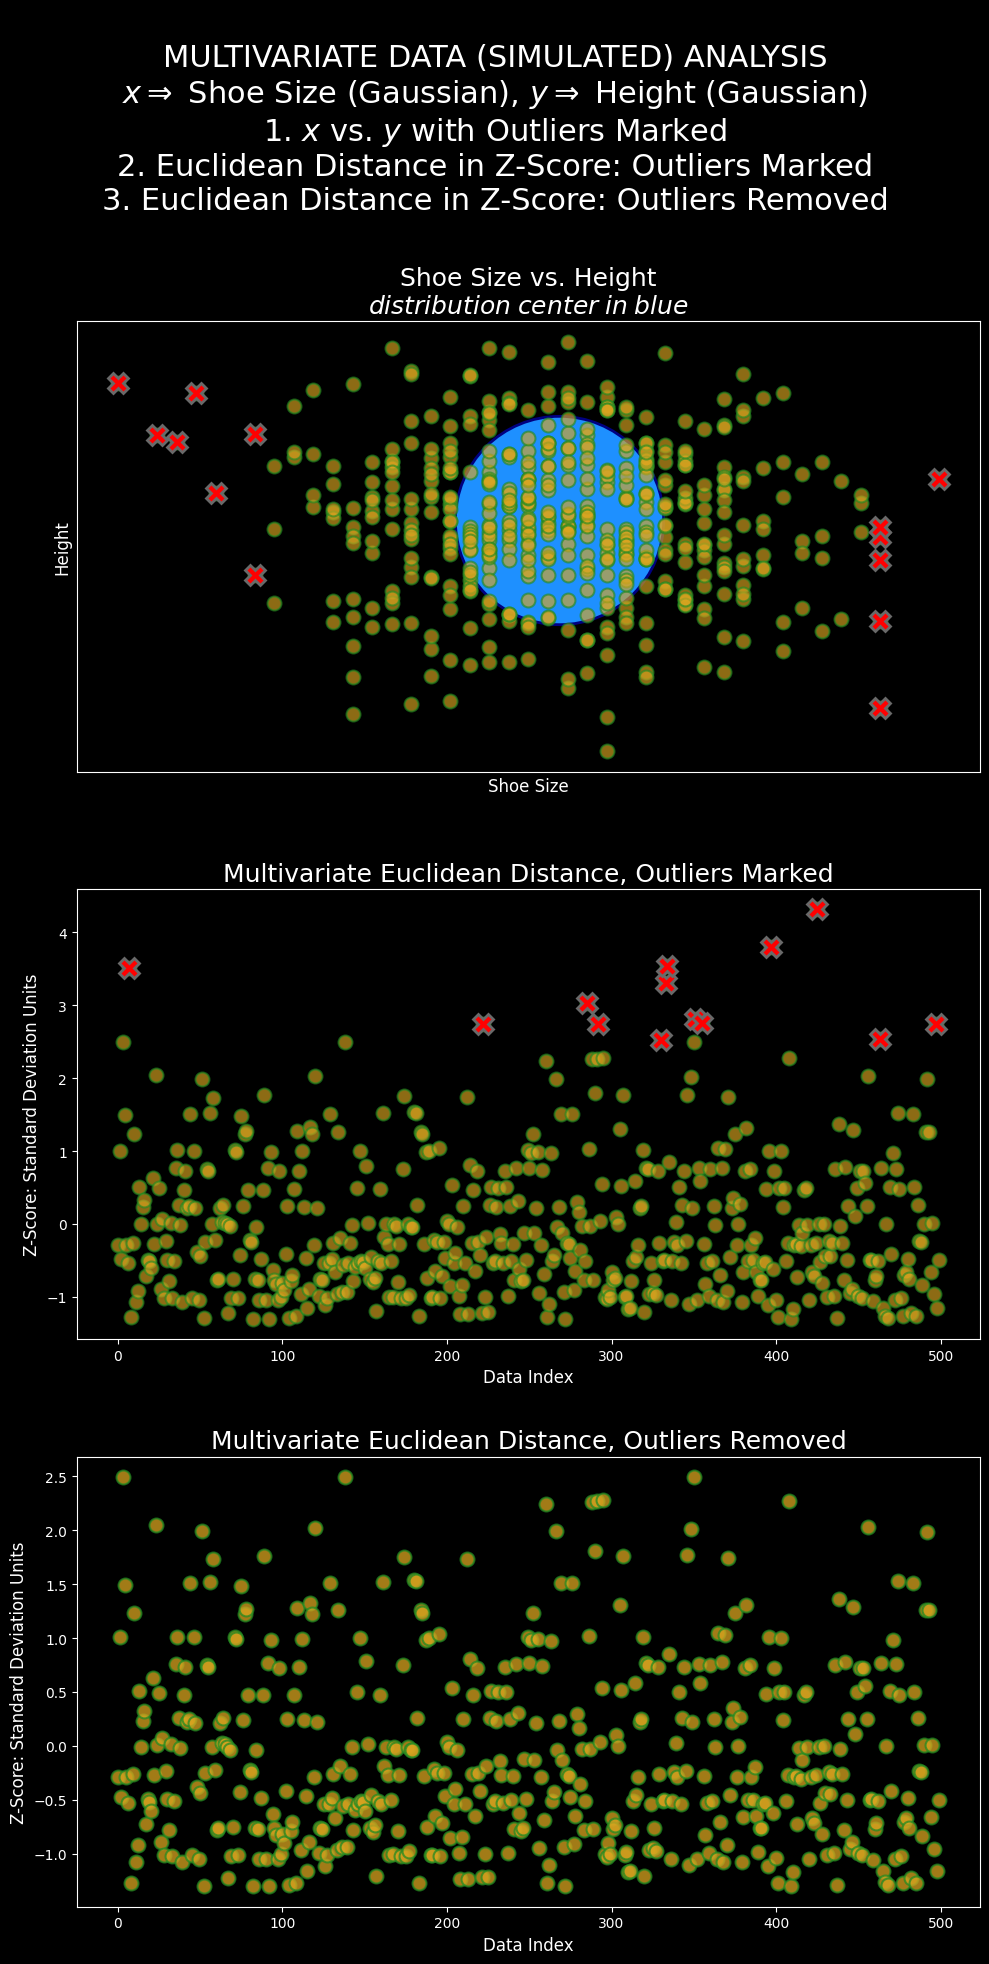

In [8]:
# Number of datapoints:
N = 500

# # CREATE TWO DISTRIBUTIONS TO COMPARE...
# Generate simulated shoe size data:
shoe_range = np.arange(6, 17)
data_shoe = np.round(
    np.random.normal(loc=np.mean(shoe_range), scale=np.std(shoe_range, ddof=1), size=N)
)
# Increment some of the shoe sizes by 0.5
#  to match US measurement system:
data_shoe += np.random.choice(np.arange(0, 1, 0.5), size=N)

# Generate simulated height data, in feet:
height_range = np.linspace(4.75, 6.75, N)
data_height = np.random.normal(
    loc=np.mean(height_range), scale=np.std(height_range, ddof=1), size=N
)
data_height = np.round(data_height, 2)

# Compute the multivariate mean, the mean of both
#  distributions' means:
data_mean = [np.mean(data_shoe), np.mean(data_height)]

# Compute Euclidean distance from each point in the
#  shoe/height plot to the multivariate mean:
distances_raw = np.zeros(N)
for i in range(N):
    distances_raw[i] = np.sqrt(
        (data_shoe[i] - data_mean[0]) ** 2 + (data_height[i] - data_mean[1]) ** 2
    )

# Convert Euclidean distance to z-score (standard deviation units):
distances_z = (distances_raw - np.mean(distances_raw)) / np.std(distances_raw, ddof=1)

# Threshold in standard deviation units:
distance_thresh = 2.5

# Find the offending points:
o_ind = np.where(distances_z > distance_thresh)[0]

# Remove outliers and convert back to original units:
# distances_orig = distances_z * np.std(distances_raw, ddof=1) + np.mean(distances_raw)
# distances_orig[o_ind] = np.nan
# Remove outliers:
distances_z_no_outliers = np.copy(distances_z)
distances_z_no_outliers[o_ind] = np.nan

# Use dark theme:
with plt.style.context('dark_background'):
    # Create figure:
    fig = plt.figure(figsize=(10, 20))

    # Designate and columns via GridSpec:
    gs = GridSpec(3, 1, figure=fig)

    # Create subplots:
    axes = [
        fig.add_subplot(gs[0]),
        fig.add_subplot(gs[1]),
        fig.add_subplot(gs[2]),
    ]

    # Plot the multivariate mean:
    axes[0].plot(
        data_mean[0], data_mean[1], "o", mfc="dodgerblue", mec="navy", mew=2, ms=150
    )

    axes[0].plot(
        data_shoe,
        data_height,
        "o",
        mfc="goldenrod",
        mec="forestgreen",
        mew=1.5,
        ms=10,
        alpha=0.65,
    )
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_xlabel("Shoe Size", size=12)
    axes[0].set_ylabel("Height", size=12)
    axes[0].set_title(
        "\nShoe Size vs. Height\n$distribution\\;center\\;in\\;blue$", size=18
    )

    # The plot those distances:
    axes[1].plot(
        distances_z, "ko", mfc="goldenrod", mec="forestgreen", mew=1.5, ms=10, alpha=0.65
    )
    axes[1].set_xlabel("Data Index", size=12)
    axes[1].set_ylabel("Z-Score: Standard Deviation Units", size=12)
    axes[1].set_title("\nMultivariate Euclidean Distance, Outliers Marked", size=18)

    # And cross those out:
    axes[1].plot(o_ind, distances_z[o_ind], "X", color="r", mec="dimgrey", mew=2, ms=15)
    axes[0].plot(
        data_shoe[o_ind], data_height[o_ind], "X", color="r", mec="dimgrey", mew=2, ms=15
    )

    # Plot Euclidean distances WITHOUT outliers!
    axes[2].plot(
        distances_z_no_outliers,
        "ko",
        mfc="goldenrod",
        ms=10,
        mec="forestgreen",
        mew=1.5,
        alpha=0.75,
    )
    axes[2].set_xlabel("Data Index", size=12)
    axes[2].set_ylabel("Z-Score: Standard Deviation Units", size=12)
    axes[2].set_title("\nMultivariate Euclidean Distance, Outliers Removed", size=18)

    sup_title = "\nMULTIVARIATE DATA (SIMULATED) ANALYSIS"
    sup_title += "\n$x \\Rightarrow$ Shoe Size (Gaussian), "
    sup_title += "$y \\Rightarrow$ Height (Gaussian)"
    sup_title += "\n1. $x$ vs. $y$ with Outliers Marked"
    sup_title += "\n2. Euclidean Distance in Z-Score: Outliers Marked"
    sup_title += "\n3. Euclidean Distance in Z-Score: Outliers Removed\n"
    plt.suptitle(sup_title, size=22)

    fig.tight_layout()
    plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>